In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fd=pd.read_csv('G:\Data Science\Projects\Movie Recommendation system\ml-25m\ml-25m\movies.csv')
fd.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
fd.tail()

,movieId,title,genres
36132,149522,R.O.T.O.R. (1988),Action|Sci-Fi
36133,149524,Alligator 2 - The Mutation (1991),Horror
36134,149526,Flying (1986),Drama|Romance
36135,149530,Dick Tracy Meets Gruesome (1947),Action|Crime|Mystery|Thriller
36136,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [4]:
fd.shape


(36137, 3)

In [5]:
fd.drop(['genres'], axis=1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
36132,149522,R.O.T.O.R. (1988)
36133,149524,Alligator 2 - The Mutation (1991)
36134,149526,Flying (1986)
36135,149530,Dick Tracy Meets Gruesome (1947)


In [6]:
rate = pd.read_csv('G://Data Science//Projects//Movie Recommendation system//ratings.csv')

In [7]:
rate.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
rate=rate.loc[:,['userId', 'movieId', 'rating']]
rate.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [9]:
fd=pd.merge(fd,rate)

In [10]:
fd.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0


In [11]:
fd.shape

(24490534, 5)

In [12]:
fd=fd.iloc[:1000000]

In [13]:
fd.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,51.039689,81132.064646,3.585333
std,40.255164,46911.787715,1.054285
min,1.000000,2.000000,0.500000
25%,18.000000,40437.750000,3.000000
50%,43.000000,80949.000000,4.000000
75%,85.000000,121624.000000,4.000000
max,145.000000,162541.000000,5.000000


In [14]:
fd.groupby("title").mean()['rating'].sort_values(ascending=False)

C:\Users\himan\AppData\Local\Temp\ipykernel_3100\2487746138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fd.groupby("title").mean()['rating'].sort_values(ascending=False)


title
Usual Suspects, The (1995)                   4.284353
Taxi Driver (1976)                           4.083479
Seven (a.k.a. Se7en) (1995)                  4.079166
Persuasion (1995)                            4.030000
Braveheart (1995)                            4.002273
                                               ...   
NeverEnding Story III, The (1994)            2.318661
Lawnmower Man 2: Beyond Cyberspace (1996)    2.137698
Headless Body in Topless Bar (1995)          2.062500
Gospa (1995)                                 1.928571
Kids of the Round Table (1995)               1.915385
Name: rating, Length: 144, dtype: float64

In [15]:
fd.groupby("title").count()["rating"].sort_values(ascending=False)

title
Braveheart (1995)                            59184
Toy Story (1995)                             57309
Usual Suspects, The (1995)                   55366
Seven (a.k.a. Se7en) (1995)                  50596
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    47054
                                             ...  
Sonic Outlaws (1995)                            31
Guardian Angel (1994)                           28
Nueba Yol (1995)                                20
Headless Body in Topless Bar (1995)             16
Gospa (1995)                                    14
Name: rating, Length: 144, dtype: int64

In [16]:
#data frame in which we will have rating and number of ratings column
ratings=pd.DataFrame(fd.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(fd.groupby("title").count()["rating"])

C:\Users\himan\AppData\Local\Temp\ipykernel_3100\3474160694.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings=pd.DataFrame(fd.groupby("title").mean()['rating'])


In [17]:
ratings.sort_values(by='rating',ascending=False)

,rating,number of ratings
title,,
"Usual Suspects, The (1995)",4.284353,55366
Taxi Driver (1976),4.083479,29133
Seven (a.k.a. Se7en) (1995),4.079166,50596
Persuasion (1995),4.030000,2950
Braveheart (1995),4.002273,59184
...,...,...
"NeverEnding Story III, The (1994)",2.318661,1329
Lawnmower Man 2: Beyond Cyberspace (1996),2.137698,2215
Headless Body in Topless Bar (1995),2.062500,16


In [18]:
ratings.describe()

,rating,number of ratings
count,144.000000,144.000000
mean,3.273825,6944.444444
std,0.465419,11476.605792
min,1.915385,14.000000
25%,3.042943,534.250000
50%,3.318055,2482.000000
75%,3.571229,7654.250000
max,4.284353,59184.000000


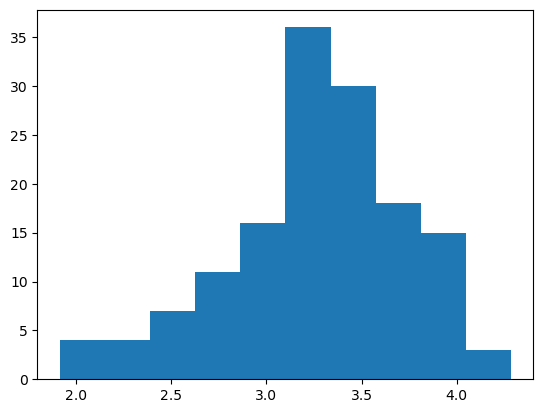

In [19]:
plt.hist(ratings['rating'])
plt.show()

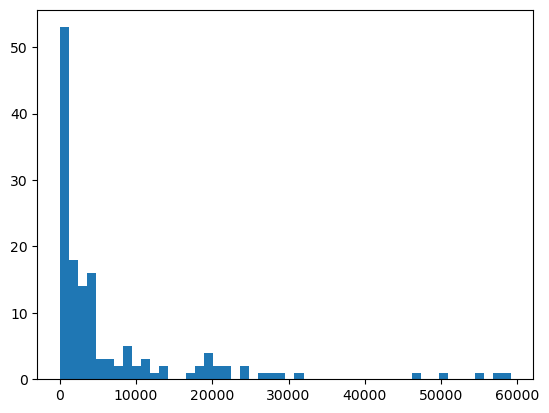

In [20]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show()

In [21]:
# Making a pivot table
pivot_table=fd.pivot_table(index=["userId"],columns=["title"],values="rating")
pivot_table.head()

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pivot_table.shape

(138544, 144)

In [23]:
def recommend_movie(movie):
    movie_watched=pivot_table[movie]
    similarity_movie=pivot_table.corrwith(movie_watched)
    #find the correlation between the movies
    similarity_movie=similarity_movie.sort_values(ascending=False)
    return similarity_movie.head()

In [24]:
recommend_movie('Taxi Driver (1976)')

title
Taxi Driver (1976)       1.000000
Jupiter's Wife (1994)    0.643570
Target (1995)            0.414861
Catwalk (1996)           0.405732
Sonic Outlaws (1995)     0.378546
dtype: float64